In [1]:
!pip install pystan

  Obtaining dependency information for pystan from https://files.pythonhosted.org/packages/d4/d3/4667b1913890108c9d2c46e2cc22cdb6bf20edc6ea910c8d0b8dab622a0e/pystan-3.8.0-py3-none-any.whl.metadata
  Using cached pystan-3.8.0-py3-none-any.whl.metadata (3.8 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)
INFO: pip is looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
  Using cached pystan-3.7.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.6.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.5.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.4.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.3.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.2.0-py3-none-any.whl (13 kB)
  Using cached pystan-3.1.1-py3-none-any.whl (13 kB)
INFO: pip is still looking at multiple versions of pystan to determine which version is compatible with other requirements. This could take a while.
  Using cached pysta

  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [6 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\anasagar\AppData\Local\Temp\pip-install-eyvquayh\pystan_21ab961f3c5741d0af07f25725a4db21\setup.py", line 122, in <module>
      from Cython.Build.Inline import _get_build_extension
  ModuleNotFoundError: No module named 'Cython'
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import prophet

In [3]:
dir(prophet)

['Path',
 'Prophet',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'about',
 'diagnostics',
 'f',
 'forecaster',
 'here',
 'make_holidays',
 'models',
 'plot']

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
df=pd.read_csv(r"C:\Users\anasagar\Documents\LearnBay\Time Series Forecasting\Self Project\ICICIBANK.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-17,21.430000,21.430000,21.070000,21.100000,20.926905,9126000
1,2023-01-18,21.299999,21.379999,21.190001,21.230000,21.055836,9779200
2,2023-01-19,21.250000,21.450001,21.200001,21.389999,21.214523,5370400
3,2023-01-20,21.440001,21.620001,21.430000,21.520000,21.343458,8004400
4,2023-01-23,21.510000,21.790001,21.450001,21.770000,21.591408,6264600
...,...,...,...,...,...,...,...
245,2024-01-08,23.750000,23.889999,23.610001,23.870001,23.870001,4719300
246,2024-01-09,23.610001,23.670000,23.490000,23.520000,23.520000,3361600
247,2024-01-10,23.840000,24.120001,23.840000,23.959999,23.959999,3761400
248,2024-01-11,23.870001,24.020000,23.709999,23.959999,23.959999,6026100


In [7]:
df.shape

(250, 7)

In [8]:
len(df)

250

In [10]:
df.info()
# Date column coming as a object format, so firstly we have to convert date column into a datetime format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [11]:
df['Date']=pd.to_datetime(df['Date'])

In [12]:
df.info()
# now Date column in a datetime format
# if we are building the fb prophet model,then no need to make datetime column as a index.
# when we are building the ARIMA,SARIMA etc model then need to make datetime column as a index. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       250 non-null    datetime64[ns]
 1   Open       250 non-null    float64       
 2   High       250 non-null    float64       
 3   Low        250 non-null    float64       
 4   Close      250 non-null    float64       
 5   Adj Close  250 non-null    float64       
 6   Volume     250 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 13.8 KB


In [13]:
# check datetime column in a sequential order or not
print(df['Date'].min())
print(df['Date'].max())

2023-01-17 00:00:00
2024-01-12 00:00:00


In [14]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-17,21.430000,21.430000,21.070000,21.100000,20.926905,9126000
1,2023-01-18,21.299999,21.379999,21.190001,21.230000,21.055836,9779200
2,2023-01-19,21.250000,21.450001,21.200001,21.389999,21.214523,5370400
3,2023-01-20,21.440001,21.620001,21.430000,21.520000,21.343458,8004400
4,2023-01-23,21.510000,21.790001,21.450001,21.770000,21.591408,6264600


In [15]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
245,2024-01-08,23.750000,23.889999,23.610001,23.870001,23.870001,4719300
246,2024-01-09,23.610001,23.670000,23.490000,23.520000,23.520000,3361600
247,2024-01-10,23.840000,24.120001,23.840000,23.959999,23.959999,3761400
248,2024-01-11,23.870001,24.020000,23.709999,23.959999,23.959999,6026100
249,2024-01-12,24.260000,24.379999,23.930000,24.070000,24.070000,5834000


In [18]:
dataset=df[['Date','Open']]
dataset

,Date,Open
0,2023-01-17,21.430000
1,2023-01-18,21.299999
2,2023-01-19,21.250000
3,2023-01-20,21.440001
4,2023-01-23,21.510000
...,...,...
245,2024-01-08,23.750000
246,2024-01-09,23.610001
247,2024-01-10,23.840000
248,2024-01-11,23.870001


In [20]:
# Check duplicate 
dataset.duplicated().sum() 

0

In [21]:
# whenever we are building the fb prophet model then its mandatory to convert datetime column into ds and target column into y format.
df_prophet=dataset.rename(columns={'Date':"ds","Open":"y"})
df_prophet

,ds,y
0,2023-01-17,21.430000
1,2023-01-18,21.299999
2,2023-01-19,21.250000
3,2023-01-20,21.440001
4,2023-01-23,21.510000
...,...,...
245,2024-01-08,23.750000
246,2024-01-09,23.610001
247,2024-01-10,23.840000
248,2024-01-11,23.870001


In [22]:
from prophet import Prophet

In [23]:
m=Prophet()
model = m.fit(df_prophet)

23:02:21 - cmdstanpy - INFO - Chain [1] start processing
23:02:22 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
model.seasonalities
# Only weekly data

OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

# Building Time Series Forecasting Model by using FB Prophet model

Here we are predicting 1 month data

In [25]:
future_data=model.make_future_dataframe(periods=30,freq='D')
# Periods means we have to predict for how many daya, 180 days means 6 month
# frequency means we will predict on which basis, here we are predicting for Daily basis

In [26]:
future_data

,ds
0,2023-01-17
1,2023-01-18
2,2023-01-19
3,2023-01-20
4,2023-01-23
...,...
275,2024-02-07
276,2024-02-08
277,2024-02-09
278,2024-02-10


In [28]:
prediction=model.predict(future_data)
prediction

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-01-17,21.016459,20.459351,21.535581,21.016459,21.016459,-0.030723,-0.030723,-0.030723,-0.030723,-0.030723,-0.030723,0.0,0.0,0.0,20.985736
1,2023-01-18,21.009537,20.380050,21.476430,21.009537,21.009537,-0.084469,-0.084469,-0.084469,-0.084469,-0.084469,-0.084469,0.0,0.0,0.0,20.925068
2,2023-01-19,21.002616,20.373145,21.426279,21.002616,21.002616,-0.105446,-0.105446,-0.105446,-0.105446,-0.105446,-0.105446,0.0,0.0,0.0,20.897170
3,2023-01-20,20.995695,20.370888,21.446201,20.995695,20.995695,-0.089451,-0.089451,-0.089451,-0.089451,-0.089451,-0.089451,0.0,0.0,0.0,20.906244
4,2023-01-23,20.974931,20.343912,21.439439,20.974931,20.974931,-0.066627,-0.066627,-0.066627,-0.066627,-0.066627,-0.066627,0.0,0.0,0.0,20.908304
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,2024-02-07,25.010915,24.318617,25.522792,24.850448,25.178697,-0.084469,-0.084469,-0.084469,-0.084469,-0.084469,-0.084469,0.0,0.0,0.0,24.926446
276,2024-02-08,25.035887,24.322211,25.532039,24.862161,25.219325,-0.105446,-0.105446,-0.105446,-0.105446,-0.105446,-0.105446,0.0,0.0,0.0,24.930441
277,2024-02-09,25.060859,24.393636,25.588928,24.871142,25.253646,-0.089451,-0.089451,-0.089451,-0.089451,-0.089451,-0.089451,0.0,0.0,0.0,24.971407
278,2024-02-10,25.085831,24.686010,25.901279,24.884896,25.288953,0.188358,0.188358,0.188358,0.188358,0.188358,0.188358,0.0,0.0,0.0,25.274189


In [29]:
prediction.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [33]:
prediction[['ds','yhat_lower', 'yhat_upper','yhat']].tail(30)

,ds,yhat_lower,yhat_upper,yhat
250,2024-01-13,23.989800,25.076257,24.574982
251,2024-01-14,24.084812,25.121356,24.599954
252,2024-01-15,23.833447,24.916089,24.369940
253,2024-01-16,23.883086,24.973350,24.430815
254,2024-01-17,23.785149,24.984120,24.402041
255,2024-01-18,23.855775,24.961556,24.406036
256,2024-01-19,23.872045,24.993578,24.447002
257,2024-01-20,24.184888,25.276189,24.749784
258,2024-01-21,24.237372,25.367820,24.774755
259,2024-01-22,23.986080,25.073868,24.544742


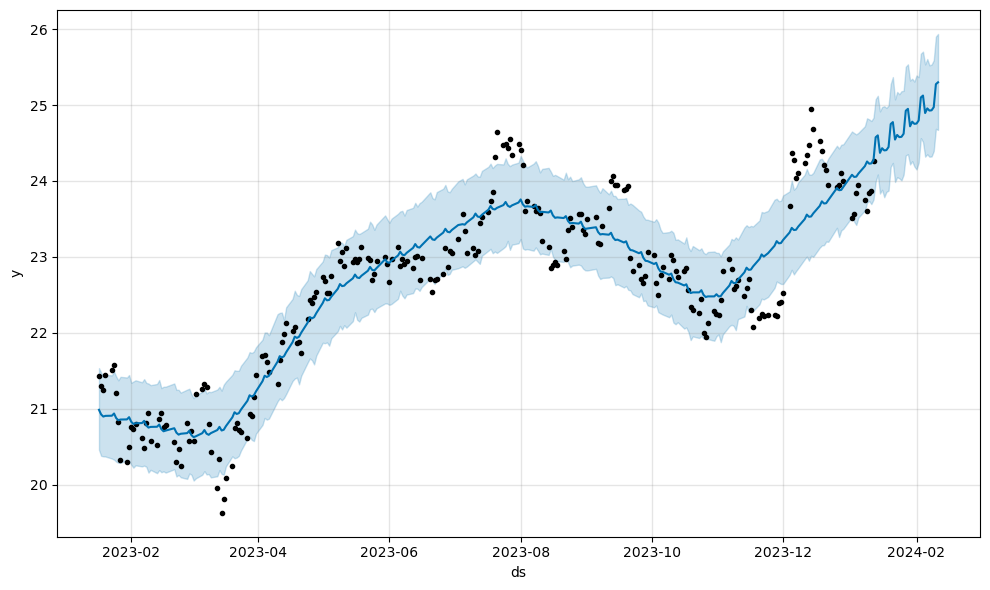

In [34]:
model.plot(prediction)
plt.show()

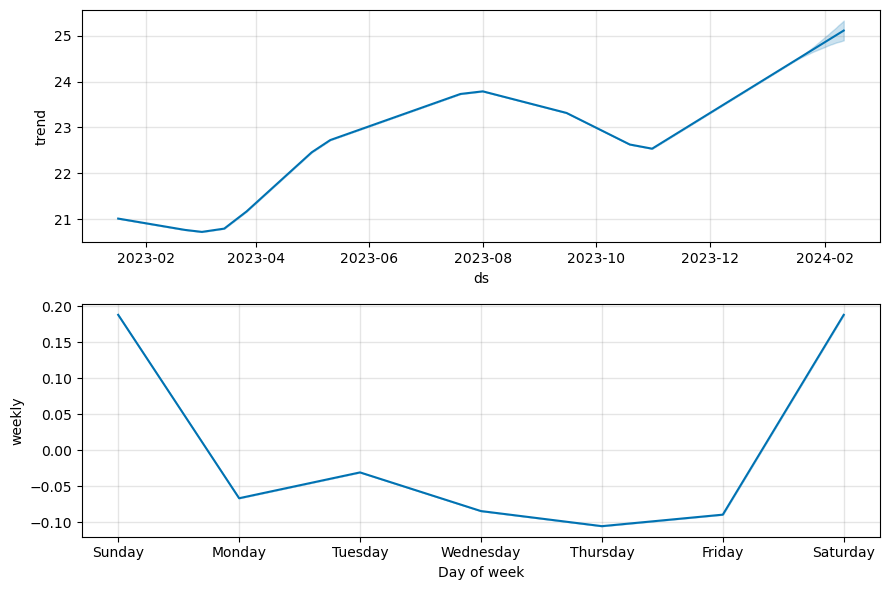

In [35]:
model.plot_components(prediction)
plt.show()

In [49]:
# check cross validation
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model,horizon='7 days',period='15 days',initial='7 days')
# initial='7 days' that means check weekly
# horizon='7 days' , we are taking 7 days data because its a weekly data 
# period='15 days' , every two weaks we are evaluating that our model is going perfactly fine or not  

  0%|          | 0/24 [00:00<?, ?it/s]

23:14:43 - cmdstanpy - INFO - Chain [1] start processing
23:14:48 - cmdstanpy - INFO - Chain [1] done processing
23:14:48 - cmdstanpy - INFO - Chain [1] start processing
23:14:48 - cmdstanpy - INFO - Chain [1] done processing
23:14:49 - cmdstanpy - INFO - Chain [1] start processing
23:14:49 - cmdstanpy - INFO - Chain [1] done processing
23:14:49 - cmdstanpy - INFO - Chain [1] start processing
23:14:50 - cmdstanpy - INFO - Chain [1] done processing
23:14:50 - cmdstanpy - INFO - Chain [1] start processing
23:14:50 - cmdstanpy - INFO - Chain [1] done processing
23:14:50 - cmdstanpy - INFO - Chain [1] start processing
23:14:51 - cmdstanpy - INFO - Chain [1] done processing
23:14:51 - cmdstanpy - INFO - Chain [1] start processing
23:14:52 - cmdstanpy - INFO - Chain [1] done processing
23:14:52 - cmdstanpy - INFO - Chain [1] start processing
23:14:52 - cmdstanpy - INFO - Chain [1] done processing
23:14:53 - cmdstanpy - INFO - Chain [1] start processing
23:14:53 - cmdstanpy - INFO - Chain [1]

In [50]:
from prophet.diagnostics import performance_metrics

In [51]:
df_performance = performance_metrics(df_cv)
df_performance

# mape - mean absolute percentage error

#  MAPE                Forecasting
#---------------    ----------------------
#  < 10%              Highly accurate
#  10% to 20%        Good Forecasting
#  20% to 50%        Reasonable Forecasting
#  > 50%             Weak & inaccurate Forecasting

# Check top 9 days(approaximately 1.5 weak) mape value gives less then 10%, so we can say that our model is highly accurate for one week or 1.5 week
# if we will check after 9 days, mape value gives more then 10%, so can say that model is good Forecasting  

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,0.264227,0.514030,0.333564,0.014328,0.009893,0.014474,0.705882
1,2 days,0.417962,0.646500,0.452243,0.020260,0.012693,0.020271,0.666667
2,3 days,0.281980,0.531018,0.426074,0.019065,0.020077,0.018952,0.562500
3,4 days,0.381420,0.617592,0.492734,0.022569,0.018861,0.022378,0.400000
4,5 days,0.523470,0.723512,0.542973,0.024367,0.020756,0.024445,0.444444
5,6 days,0.511466,0.715169,0.527785,0.023218,0.017705,0.023210,0.500000
6,7 days,0.590692,0.768565,0.508338,0.021952,0.012690,0.022107,0.611111


In [52]:
# Based upon the mape value we can say that our model is highly accurate because mape value is coming less then 10%

In [53]:
from prophet.plot import plot_cross_validation_metric


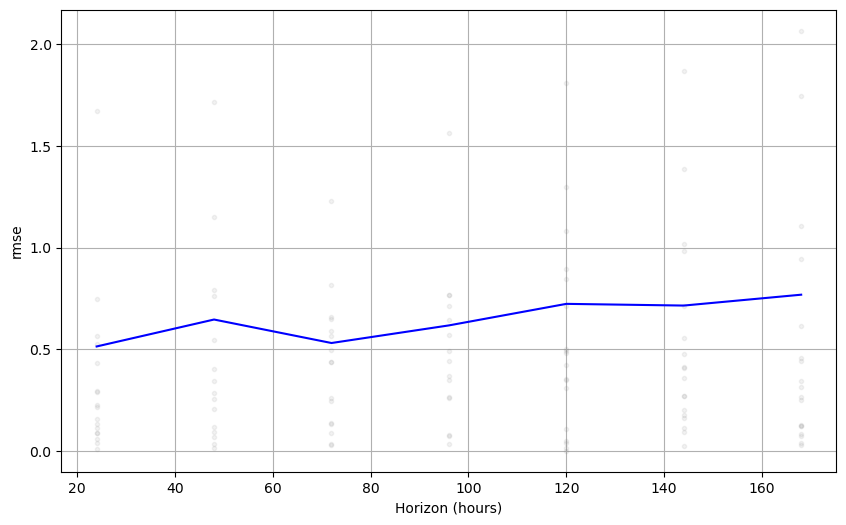

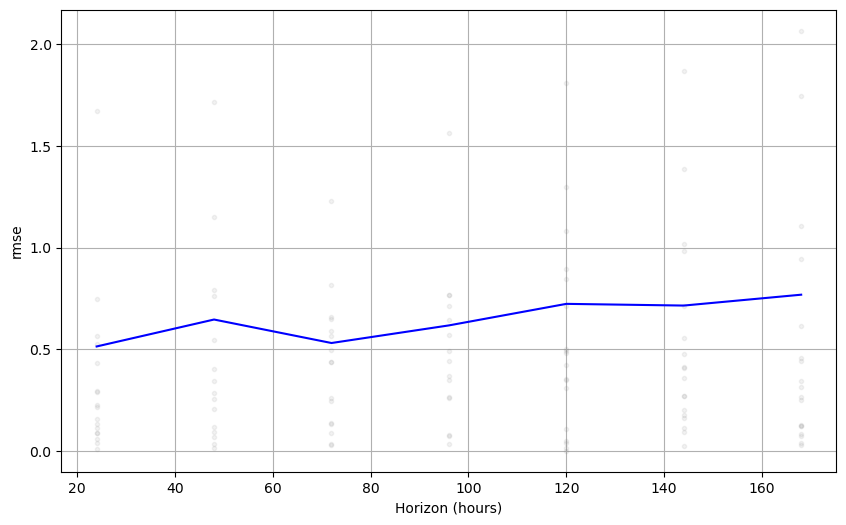

In [54]:
plot_cross_validation_metric(df_cv,metric='rmse')